<h1>Hospital Readmissions Predictions Modelling</h1>

In [1]:
#Importing required libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

Using TensorFlow backend.


In [2]:
#Importing pickle files
f_bow=open('test_df','rb')
test_df=pickle.load(f_bow)
f_bow.close()

f_bow=open('train_df','rb')
train_df=pickle.load(f_bow)
f_bow.close()

f_bow=open('y_train','rb')
y_train=pickle.load(f_bow)
f_bow.close()

f_bow=open('y_test','rb')
y_test=pickle.load(f_bow)
f_bow.close()

In [3]:
#Taking feature names into vaiable
features=list(train_df.columns)

In [4]:
#Number of features present in one hot encoded data representation
len(features)

1133

In [5]:
#Converting dataframe into integer form
train_df=train_df.astype('int')
test_df=test_df.astype('int')

In [6]:
#Converting labels into binary representation for getting AUC probabilities
y_train=y_train.replace('NO',0)
y_train=y_train.replace('Admitted',1)
y_test=y_test.replace('NO',0)
y_test=y_test.replace('Admitted',1)

In [7]:
#Converting dataframes into sparse matrices
train=scipy.sparse.csr_matrix(train_df)
test=scipy.sparse.csr_matrix(test_df)

In [8]:
#Data Standardization
standard= StandardScaler(with_mean=False)

train=standard.fit_transform(train)
test=standard.transform(test)

C:\Users\bogga\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bogga\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\bogga\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
#Reading pickle files of Response Coded data
f_bow=open('train_df_R','rb')
train_R=pickle.load(f_bow)
f_bow.close()

f_bow=open('test_df_R','rb')
test_R=pickle.load(f_bow)
f_bow.close()

<h2>Feature Engineering</h2>

In [10]:
#Adding both num_procedures and num_lab_procedures and keeping it in another feature total_procedures
train_df['total_procedures']=train_df['num_procedures']+train_df['num_lab_procedures']
test_df['total_procedures']=test_df['num_procedures']+test_df['num_lab_procedures']

#Adding num_medications with 19(as there are 19 medications patients gone through)
train_df['total_medications'] = train_df['num_medications']+19
test_df['total_medications'] = test_df['num_medications']+19

1. Here we are creating new feature called total procedures which is an addition of numer of procedures and number of lab procedures.
2. We are creating one more column called total medications which is combinations of num_medications and extra medications 19 patient gone through.

<h2>1. Logistic Regression</h2>

<h3>1.1 Logistic Regression using L1</h3>

In [11]:
from sklearn.model_selection import GridSearchCV

sgd=linear_model.SGDClassifier(loss='log',penalty='l1')
clf=CalibratedClassifierCV(sgd,method='sigmoid')
alphas={'base_estimator__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]}
grid = GridSearchCV(clf, alphas, cv=10,scoring='roc_auc')
grid.fit(train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

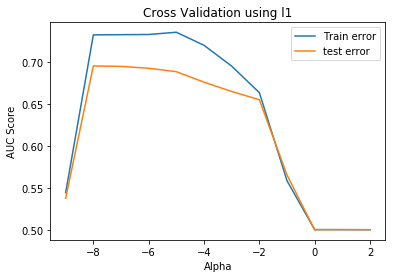

In [12]:
alphas=[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]
plt.xlabel('Alpha')
plt.ylabel('AUC Score')
plt.title('Cross Validation using l1')
plt.plot(np.log10(alphas),grid.cv_results_['mean_train_score'])
plt.plot(np.log10(alphas),grid.cv_results_['mean_test_score'])
plt.legend(['Train error','test error'])
plt.show()

<h3> 1.2 Logistic Regression using L2</h3>

In [13]:
from sklearn.model_selection import GridSearchCV

sgd=linear_model.SGDClassifier(loss='log',penalty='l2')
clf=CalibratedClassifierCV(sgd,method='sigmoid')
alphas={'base_estimator__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]}
grid = GridSearchCV(clf, alphas, cv=10,scoring='roc_auc')
grid.fit(train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

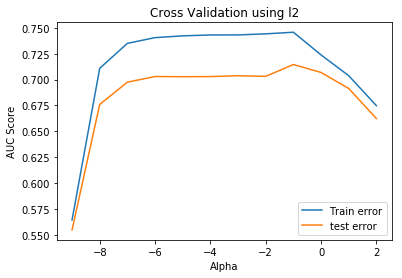

In [14]:
alphas=[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]
plt.xlabel('Alpha')
plt.ylabel('AUC Score')
plt.title('Cross Validation using l2')
plt.plot(np.log10(alphas),grid.cv_results_['mean_train_score'])
plt.plot(np.log10(alphas),grid.cv_results_['mean_test_score'])
plt.legend(['Train error','test error'])
plt.show()

<h3> 1.3 Hyper parameter tuning of Logistic Regression using Grid Search</h3>

In [15]:
sgd=linear_model.SGDClassifier(loss='log')
clf=CalibratedClassifierCV(sgd,method='sigmoid')
alphas={'base_estimator__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]
        ,'base_estimator__penalty':['l1','l2'],
        'base_estimator__class_weight':[None,'balanced']}
grid = GridSearchCV(clf, alphas, cv=10,scoring='roc_auc')
grid.fit(train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 1, 10, 100], 'base_estimator__penalty': ['l1', 'l2'], 'base_estimator__class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

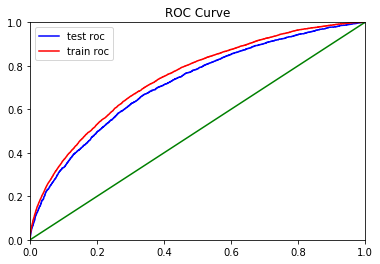

In [16]:
sgd=linear_model.SGDClassifier(loss='log',alpha=grid.best_params_.get('base_estimator__alpha'),
                               penalty=grid.best_params_.get('base_estimator__penalty'))
sgd.fit(train,y_train)
clf=CalibratedClassifierCV(sgd,method='sigmoid')
clf.fit(train,y_train)
probs=clf.predict_proba(test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_test),preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC Curve')
plt.plot(fpr,tpr,'b')
probs=clf.predict_proba(train)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_train),preds)

plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'g')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['test roc','train roc'])
plt.show()

In [17]:
print('Test AUC score using Logistic-Regression is ',roc_auc)

Test AUC score using Logistic-Regression is  0.7182937193378942


In [28]:
#Function to plot confusion matrix
def confusion_matrix(y_test,pred):
    
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, pred)
    
    cm_df = pd.DataFrame(cm,index=['NO','Admitted'], 
                         columns = ['NO','Admitted'])
    # Show confusion matrix in a separate window
    #plt.matshow(cm)
    sns.heatmap(cm_df, annot=True, fmt='g')
    plt.title('\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred)))
    #plt.title('Confusion matrix')
    #plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

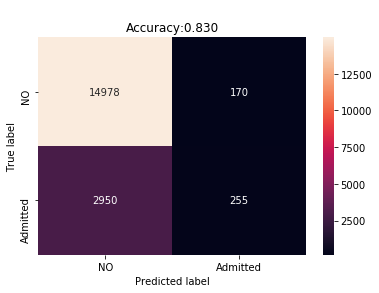

In [19]:
y_pred=clf.predict(test)
confusion_matrix(y_test,y_pred)

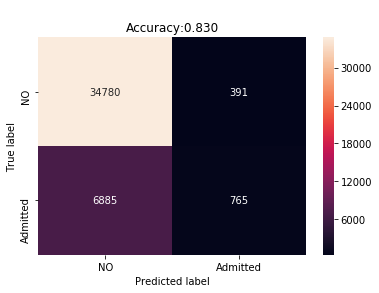

In [20]:
y_pred=clf.predict(train)
confusion_matrix(y_train,y_pred)

In [21]:
#Function for getting important features
def show_most_informative_features(vectorizer, clf, n):
    class_labels=sgd.classes_
    important=""
    positives = sorted(zip(sgd.coef_[0], features),reverse=True)[:n]
    negatives = sorted(zip(1-sgd.coef_[0], features),reverse=True)[:n]
    print("Important Features for Admissions")
    for coef_1, fn_1 in positives:
        print ("\t%.4f\t%-15s\t" % (coef_1, fn_1))
    print("Important Features for NO Admissions")
    for coef_1, fn_1 in negatives:
        print ("\t%.4f\t%-15s\t" % (coef_1, fn_1))
        #important =important+" "+fn_1
    #return important

In [22]:
show_most_informative_features('',sgd,10)

Important Features for Admissions
	0.3193	number_inpatient	
	0.1218	number_emergency	
	0.0563	number_diagnoses	
	0.0559	403            	
	0.0551	428            	
	0.0436	536            	
	0.0414	num_medications	
	0.0381	yes_diabetesmed	
	0.0358	unkown_a1cresult	
	0.0348	number_outpatient	
Important Features for NO Admissions
	1.0462	401            	
	1.0394	no_diabetesmed 	
	1.0318	reconstructive 	
	1.0317	786            	
	1.0292	272            	
	1.0288	278            	
	1.0278	574            	
	1.0278	540            	
	1.0272	steady_metformin	
	1.0272	486            	


<h3> 2. Support Vector Machine using Grid Search with One Hot Encoded Features</h3>

In [23]:
sgd=linear_model.SGDClassifier(loss='hinge')
clf=CalibratedClassifierCV(sgd,method='sigmoid')
alphas={'base_estimator__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]}
grid = GridSearchCV(clf, alphas, cv=10,scoring='roc_auc')
grid.fit(train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

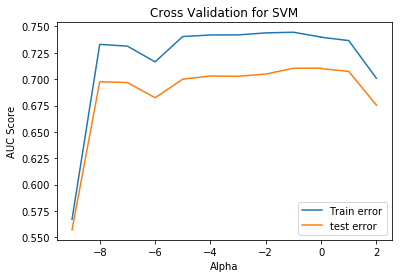

In [24]:
alphas=[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]
plt.xlabel('Alpha')
plt.ylabel('AUC Score')
plt.title('Cross Validation for SVM')
plt.plot(np.log10(alphas),grid.cv_results_['mean_train_score'])
plt.plot(np.log10(alphas),grid.cv_results_['mean_test_score'])
plt.legend(['Train error','test error'])
plt.show()

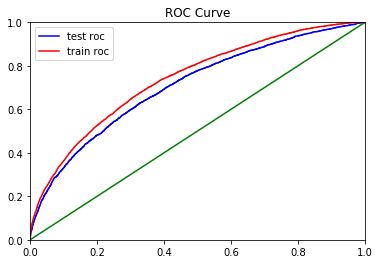

In [25]:
sgd=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)
sgd.fit(train,y_train)
clf=CalibratedClassifierCV(sgd,method='sigmoid')
clf.fit(train,y_train)
probs=clf.predict_proba(test)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_test),preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC Curve')
plt.plot(fpr,tpr,'b')
probs=clf.predict_proba(train)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_train),preds)

plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'g')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['test roc','train roc'])
plt.show()

In [26]:
print('Test AUC score using SVM is ',roc_auc)

Test AUC score using SVM is  0.707235999500714


In [27]:
show_most_informative_features('',sgd,10)

Important Features for Admissions
	69.8028	number_inpatient	
	24.9697	number_emergency	
	13.4922	250            	
	13.1437	428            	
	11.7959	number_diagnoses	
	11.3077	num_medications	
	11.0146	491            	
	9.6202	e817           	
	9.6202	684            	
	9.6202	146            	
Important Features for NO Admissions
	17.2997	218            	
	15.0104	654            	
	14.5331	540            	
	13.8638	566            	
	13.6361	otolaryngology 	
	12.9729	786            	
	12.7855	v27            	
	12.5711	pediatrics     	
	12.3398	923            	
	12.2892	726            	


Test Confusion Matrix


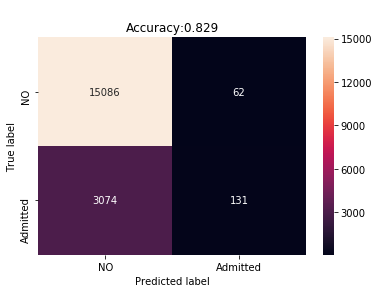

In [28]:
print('Test Confusion Matrix')
y_pred=clf.predict(test)
confusion_matrix(y_test,y_pred)

Train Confusion Matrix


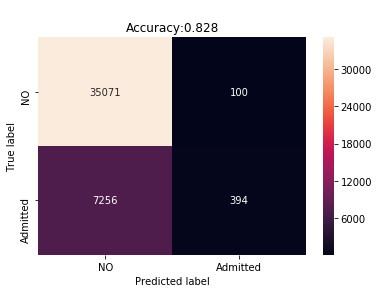

In [29]:
print('Train Confusion Matrix')
y_pred=clf.predict(train)
confusion_matrix(y_train,y_pred)

In [30]:
f_bow=open('train_df_R','rb')
train_R=pickle.load(f_bow)
f_bow.close()

f_bow=open('test_df_R','rb')
test_R=pickle.load(f_bow)
f_bow.close()

<h3> 3. Support Vector Machine using Grid Search with Response Coded Features</h3>

In [31]:
sgd=linear_model.SGDClassifier(loss='hinge')
clf=CalibratedClassifierCV(sgd,method='sigmoid')
alphas={'base_estimator__alpha':[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1,10,100]}
grid = GridSearchCV(clf, alphas, cv=10,scoring='roc_auc')
grid.fit(train_R,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
            cv='warn', method='sigmoid'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__alpha': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

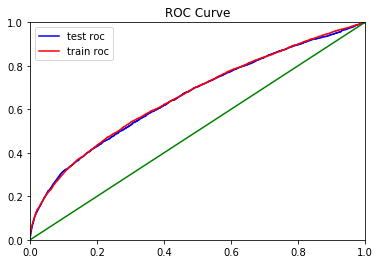

In [32]:
sgd=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)
sgd.fit(train_R,y_train)
clf=CalibratedClassifierCV(sgd,method='sigmoid')
clf.fit(train_R,y_train)
probs=clf.predict_proba(test_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_test),preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC Curve')
plt.plot(fpr,tpr,'b')
probs=clf.predict_proba(train_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_train),preds)

plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'g')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['test roc','train roc'])
plt.show()

In [33]:
print('Test AUC score using SVM is ',roc_auc)

Test AUC score using SVM is  0.6600743491054667


Test Confusion Matrix


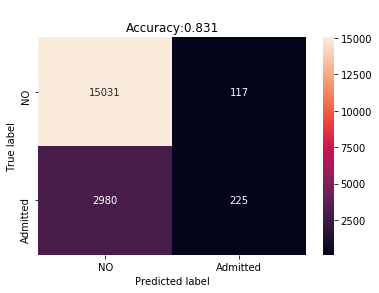

In [34]:
print('Test Confusion Matrix')
y_pred=clf.predict(test_R)
confusion_matrix(y_test,y_pred)

Train Confusion Matrix


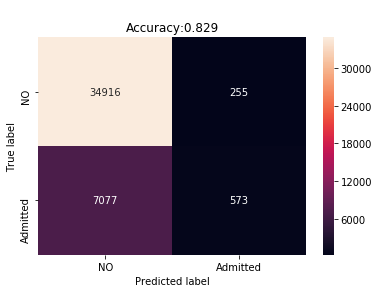

In [36]:
print('Train Confusion Matrix')
y_pred=clf.predict(train_R)
confusion_matrix(y_train,y_pred)

<h3> 4. Decision Tree using Grid Search with Response Coded Features</h3>

In [37]:
dct=DecisionTreeClassifier()
clf=CalibratedClassifierCV(dct,method='sigmoid')
param_test = {'base_estimator__max_depth':range(1,15,2)}
grid = GridSearchCV(clf, param_test, cv=5,scoring='roc_auc')
grid.fit(train_R,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
            cv='warn', method='sigmoid'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__max_depth': range(1, 15, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

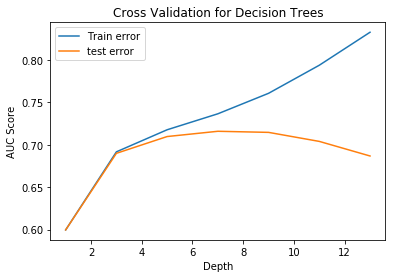

In [38]:
alphas=list(range(1,15,2))
plt.xlabel('Depth')
plt.ylabel('AUC Score')
plt.title('Cross Validation for Decision Trees')
plt.plot(alphas,grid.cv_results_['mean_train_score'])
plt.plot(alphas,grid.cv_results_['mean_test_score'])
plt.legend(['Train error','test error'])
plt.show()

In [39]:
dct=DecisionTreeClassifier()
clf=CalibratedClassifierCV(dct,method='sigmoid')
param_test = {'base_estimator__max_depth':range(1,15,2), 'base_estimator__min_samples_split':range(200,501,100),
             'base_estimator__min_samples_leaf':range(10,101,10)}
grid = GridSearchCV(clf, param_test, cv=10,scoring='roc_auc')
grid.fit(train_R,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
            cv='warn', method='sigmoid'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'base_estimator__max_depth': range(1, 15, 2), 'base_estimator__min_samples_split': range(200, 501, 100), 'base_estimator__min_samples_leaf': range(10, 101, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

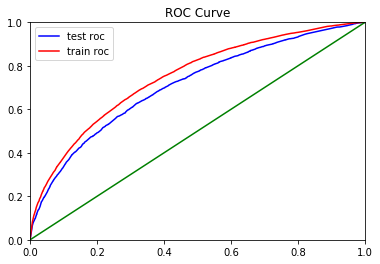

In [45]:
dct=DecisionTreeClassifier(max_depth=grid.best_params_.get('base_estimator__max_depth'),
                           min_samples_split=grid.best_params_.get('base_estimator__min_samples_split'),
                          min_samples_leaf=grid.best_params_.get('base_estimator__min_samples_leaf'))

dct.fit(train_R,y_train)
clf=CalibratedClassifierCV(dct,method='sigmoid')
clf.fit(train_R,y_train)
probs=clf.predict_proba(test_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_test),preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC Curve')
plt.plot(fpr,tpr,'b')
probs=clf.predict_proba(train_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_train),preds)

plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'g')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['test roc','train roc'])
plt.show()

In [46]:
print('Test AUC score using Decision Trees is ',roc_auc)

Test AUC score using Decision Trees is  0.7095736625873801


<h4>Important Feaatures usinng Decision Tree</h4>

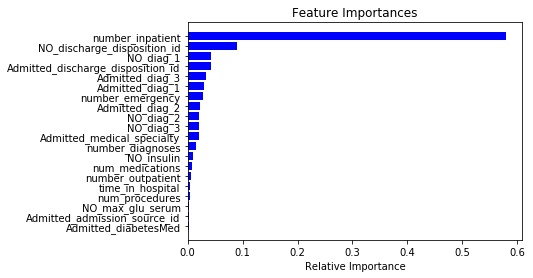

In [55]:
features_R=train_R.columns
importances=dct.feature_importances_
indices=np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features_R[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Test Confusion Matrix


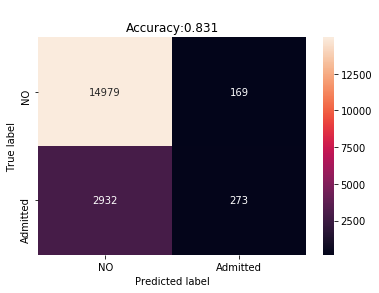

In [58]:
print('Test Confusion Matrix')
y_pred=clf.predict(test_R)
confusion_matrix(y_test,y_pred)

Train Confusion Matrix


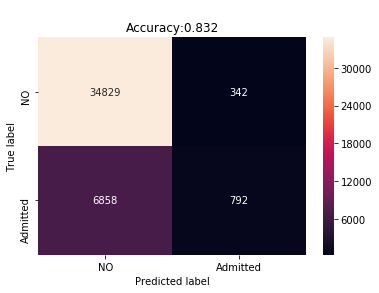

In [59]:
print('Train Confusion Matrix')
y_pred=clf.predict(train_R)
confusion_matrix(y_train,y_pred)

<h3>5. Random Forest using Grid Search with Response Coded Features</h3>

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_test = {'n_estimators':range(20,101,20)}
gsearch = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced'),param_grid = param_test,
                       scoring='roc_auc',n_jobs=-1,iid=False, cv=3)

gsearch.fit(train_R,y_train)
print(gsearch.best_score_)

0.720376832989499


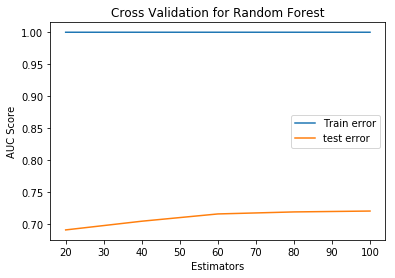

In [57]:
alphas=list(range(20,101,20))
plt.xlabel('Estimators')
plt.ylabel('AUC Score')
plt.title('Cross Validation for Random Forest')
plt.plot(alphas,gsearch.cv_results_['mean_train_score'])
plt.plot(alphas,gsearch.cv_results_['mean_test_score'])
plt.legend(['Train error','test error'])
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_test = {'n_estimators':range(20,621,100),'max_depth':range(5,15,2),
              }
gsearch = GridSearchCV(estimator = RandomForestClassifier(class_weight='balanced'),param_grid = param_test,
                       scoring='roc_auc',iid=False, cv=3)

gsearch.fit(train_R,y_train)
print(gsearch.best_score_)

0.7281889396749568


In [66]:
print(gsearch.best_params_.get('n_estimators'))

420


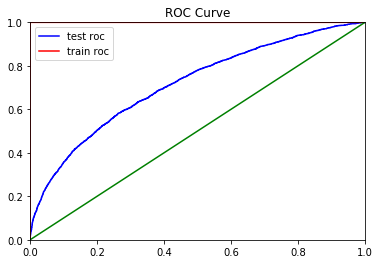

In [67]:
rf=RandomForestClassifier(max_depth=gsearch.best_params_.get('base_estimator__max_depth'),
                           n_estimators=420)

rf.fit(train_R,y_train)
clf=CalibratedClassifierCV(rf,method='sigmoid')
clf.fit(train_R,y_train)
probs=clf.predict_proba(test_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_test),preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC Curve')
plt.plot(fpr,tpr,'b')
probs=clf.predict_proba(train_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_train),preds)

plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'g')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['test roc','train roc'])
plt.show()

In [68]:
print('Test AUC score using Random Forest is ',roc_auc)

Test AUC score using Random Forest is  0.7155372863977142


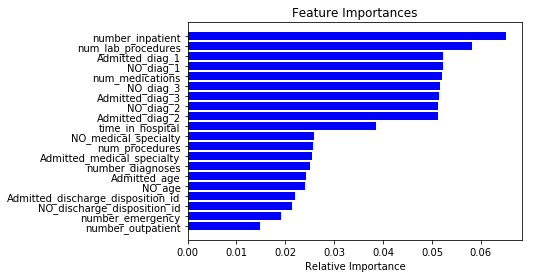

In [70]:
features_R=train_R.columns
importances=rf.feature_importances_
indices=np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features_R[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Test Confusion Matrix


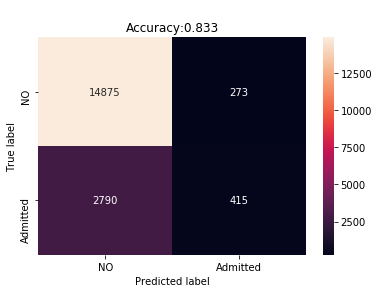

In [71]:
print('Test Confusion Matrix')
y_pred=clf.predict(test_R)
confusion_matrix(y_test,y_pred)

Train Confusion Matrix


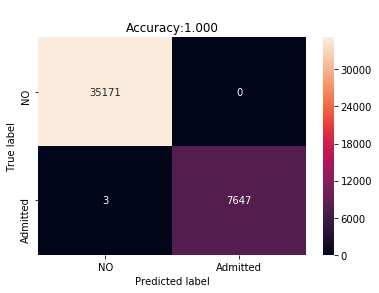

In [72]:
print('Train Confusion Matrix')
y_pred=clf.predict(train_R)
confusion_matrix(y_train,y_pred)

<h3> 6. XGBoost model using Random Search with Response Coded Features</h3>

In [13]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
params = {'base_estimator__min_child_weight': [1, 5, 10],'base_estimator__gamma': [0.5, 1, 1.5, 2, 5],
          'base_estimator__subsample': [0.6, 0.8, 1.0],
          'base_estimator__colsample_bytree': [0.6, 0.8, 1.0],'base_estimator__max_depth': [3, 4, 5],
          'base_estimator__learning_rate':[0.02,0.04,0.06],
          'base_estimator__n_estimators':[50,70,90,110,130,150,200]
         }
xgb=XGBClassifier(objective='binary:logistic')

clf=CalibratedClassifierCV(xgb,method='sigmoid')

rf_xgb = RandomizedSearchCV(clf, param_distributions=params,n_iter=15,cv=10,scoring='roc_auc',random_state=25)

rf_xgb.fit(train_R,y_train)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
            cv='warn', method='sigmoid'),
          fit_params=None, iid='warn', n_iter=15, n_jobs=None,
          param_distributions={'base_estimator__min_child_weight': [1, 5, 10], 'base_estimator__gamma': [0.5, 1, 1.5, 2, 5], 'base_estimator__subsample': [0.6, 0.8, 1.0], 'base_estimator__colsample_bytree': [0.6, 0.8, 1.0], 'base_estimator__max_depth': [3, 4, 5], 'base_estimator__learning_rate': [0.02, 0.04, 0.06], 'base_estimator__n_estimators': [50, 70, 90, 110, 130, 150, 200]},
     

In [15]:
print(rf_xgb.best_params_.get('base_estimator__min_child_weight'))
print(rf_xgb.best_params_.get('base_estimator__gamma'))
print(rf_xgb.best_params_.get('base_estimator__subsample'))
print(rf_xgb.best_params_.get('base_estimator__colsample_bytree'))
print(rf_xgb.best_params_.get('base_estimator__max_depth'))
print(rf_xgb.best_params_.get('base_estimator__learning_rate'))
print(rf_xgb.best_params_.get('base_estimator__n_estimators'))

1
1.5
0.8
1.0
5
0.06
150


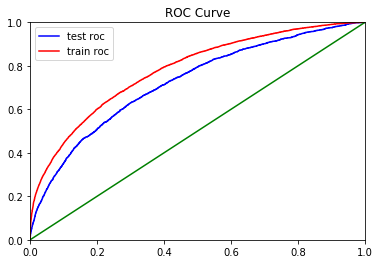

In [17]:
rf=XGBClassifier(max_depth=rf_xgb.best_params_.get('base_estimator__max_depth'),
                           n_estimators=rf_xgb.best_params_.get('base_estimator__n_estimators'),
                          learning_rate=rf_xgb.best_params_.get('base_estimator__learning_rate'),
                          colsample_bytree=rf_xgb.best_params_.get('base_estimator__colsample_bytree'),
                          subsample=rf_xgb.best_params_.get('base_estimator__subsample'),
                          gamma=rf_xgb.best_params_.get('base_estimator__gamma'),
                          min_child_weight=rf_xgb.best_params_.get('base_estimator__min_child_weight')
                         ,objective='binary:logistic')

rf.fit(train_R,y_train)
clf=CalibratedClassifierCV(rf,method='sigmoid')
clf.fit(train_R,y_train)
probs=clf.predict_proba(test_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_test),preds)
roc_auc=metrics.auc(fpr,tpr)

plt.title('ROC Curve')
plt.plot(fpr,tpr,'b')
probs=clf.predict_proba(train_R)
preds=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(np.array(y_train),preds)

plt.plot(fpr,tpr,'r')
plt.plot([0,1],[0,1],'g')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['test roc','train roc'])
plt.show()

In [18]:
print('Test AUC score using XGBoost Model is ',roc_auc)

Test AUC score using XGBoost Model is  0.7237048330626121


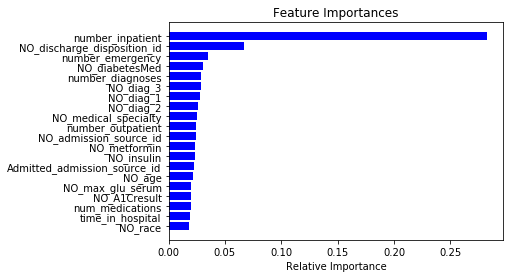

In [19]:
features_R=train_R.columns
importances=rf.feature_importances_
indices=np.argsort(importances)[-20:]
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices],color='b',align='center')
plt.yticks(range(len(indices)),[features_R[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Test Confusion Matrix


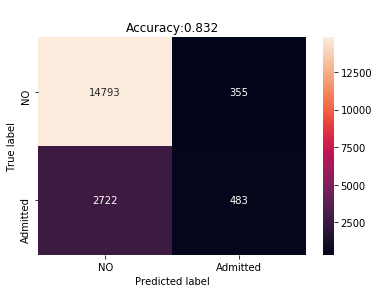

In [22]:
print('Test Confusion Matrix')
y_pred=clf.predict(test_R)
confusion_matrix(y_test,y_pred)

Train Confusion Matrix


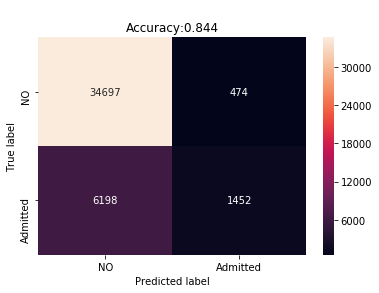

In [23]:
print('Train Confusion Matrix')
y_pred=clf.predict(train_R)
confusion_matrix(y_train,y_pred)

<h2>MLP Architectures</h2>

In [15]:
Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

In [17]:
Y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [21]:
import tensorflow as tf
from keras import backend as K
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

<h2>512-128-76 Network Architecture with batch normalization</h2>

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.normalization import BatchNormalization

output_dim = 2
input_dim = train_df.shape[1]
batch_size = 128
nb_epoch = 20

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(128, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dense(76, activation='relu',
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',auc])

history = model_relu.fit(train_df, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,
                         validation_data=(test_df, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               581632    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_17 (Dense)             (None, 76)                9804      
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 154       
Total params: 659,814
Trainable params: 658,534
Non-trainable params: 1,280
_________________________________________________________________


In [41]:
score = model_relu.evaluate(test_df, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print('Test AUC:', score[2])

Test score: 0.5718347739797908
Test accuracy: 0.8004141012498457
Test AUC: 0.9023156270586956


In [42]:
labels = {
0: 'No',
1: 'Admitted',
}
#confusion matrix for mlp architecture models
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([labels[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([labels[y] for y in np.argmax(Y_pred, axis=1)])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

In [35]:
print(confusion_matrix(Y_test, model_relu.predict(test_df)))

Pred      Admitted     No
True                     
Admitted       362   2843
No             198  14950


In [43]:
print(confusion_matrix(Y_test, model_relu.predict(test_df)))

Pred      Admitted     No
True                     
Admitted       601   2604
No            1059  14089


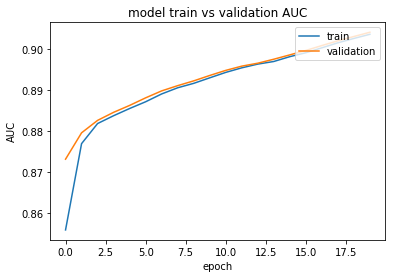

In [45]:
#plotting AUC vs Epochs for train and validation data
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model train vs validation AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<h2>500-300-100 Network Architecture with Batch Normalization and Drop out</h2>

In [47]:
from keras.layers import Dropout

output_dim = 2
input_dim = train_df.shape[1]
batch_size = 128
nb_epoch = 20

model_relu = Sequential()
model_relu.add(Dense(500, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(300, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(100, activation='relu',
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))

model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',auc])

history = model_relu.fit(train_df, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,
                         validation_data=(test_df, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 500)               568000    
_________________________________________________________________
batch_normalization_4 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               150300    
_________________________________________________________________
batch_normalization_5 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
__________

In [48]:
score = model_relu.evaluate(test_df, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print('Test AUC:', score[2])

Test score: 0.4171133229503617
Test accuracy: 0.8332697651642568
Test AUC: 0.8835305173423176


In [49]:
print(confusion_matrix(Y_test, model_relu.predict(test_df)))

Pred      Admitted     No
True                     
Admitted       530   2675
No             385  14763


In [51]:
print(confusion_matrix(Y_train, model_relu.predict(train_df)))

Pred      Admitted     No
True                     
Admitted      1332   6318
No             870  34301


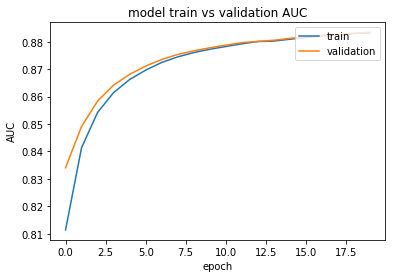

In [52]:
#plotting AUC vs Epochs for train and validation data

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model train vs validation AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

<h2>600-300-150-50 Network Architecture with DropOut and Batch Normalization</h2>

In [53]:
output_dim = 2
input_dim = train_df.shape[1]
batch_size = 128
nb_epoch = 30

model_relu = Sequential()
model_relu.add(Dense(600, activation='relu', input_shape=(input_dim,),
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.162, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(300, activation='relu', 
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))
model_relu.add(Dense(150, activation='relu',
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.1, seed=None)))

model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.4))
model_relu.add(Dense(50, activation='relu',
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))

model_relu.add(Dense(output_dim, activation='softmax'))
print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',auc])

history = model_relu.fit(train_df, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1,
                         validation_data=(test_df, Y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 600)               681600    
_________________________________________________________________
batch_normalization_6 (Batch (None, 600)               2400      
_________________________________________________________________
dropout_3 (Dropout)          (None, 600)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 300)               180300    
_________________________________________________________________
batch_normalization_7 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_4 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 150)               45150     
__________

In [54]:
score = model_relu.evaluate(test_df, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print('Test AUC:', score[2])

Test score: 0.41528068511536587
Test accuracy: 0.8334332261820525
Test AUC: 0.889001161280636


In [55]:
print(confusion_matrix(Y_test, model_relu.predict(test_df)))

Pred      Admitted     No
True                     
Admitted       433   2772
No             285  14863


In [56]:
print(confusion_matrix(Y_train, model_relu.predict(train_df)))

Pred      Admitted     No
True                     
Admitted      1164   6486
No             594  34577


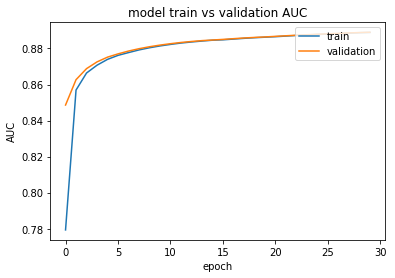

In [57]:
#plotting AUC vs Epochs for train and validation data

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model train vs validation AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

WorkFlow:

1. Downloaded data from https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#
2. Analysed data and performed data cleaning.
3. Splitted data into train and test into 70:30 split
4. Created two types of data representation i.e., OneHot Encoded Features and Response Coded Features.
5. Performed modelling using different Algorithms.
6. Cross validation plots are plotted.
7. Test and Train Confusion Matrices are plotted.
8. Important Features are obtained for all models.
9. Tried different MLP Architectures to improve AUC.
10. For MLP, Metrics used are AUC, Binary cross entropy and Accuracy.

Observations:

|Model|Test AUC|Train Accuracy|Test Accuracy|
|-----|-----|-----|-----|
|Logistic Regression using One Hot Features|0.71|83.0|83.0|
|SVM using One Hot Features|0.707|82.8|82.9|
|SVM using Response Coded Features|0.66|82.9|83.1|
|Decision Tree using Response Coded Features|0.709|83.2|83.1|
|Random Forest using Response Coded Features|0.715|100|83.3|
|XGBoost using Response Coded Features|0.7237|84.4|83.2|

---------------------------------------------------------
---------------------------------------------------------
---------------------------------------------------------

|MLP Architecture|Test AUC|Train Loss|Test Loss|Epochs|
|-----|-----|-----|-----|-----|
|512-128-76|0.904|0.28|0.57|20|
|500-300-100|0.8834|0.409|0.417|20|
|600-300-150-50|0.8890|0.4014|0.4153|30|

1. Here, we have tried 6 different models. Out of these, XGBoost Model is performing better than other models with 0.7237 of AUC.

2. For all the models, we can observe number of inpatients is most important features which tells us the number of times patient has treated as an inpatient.

3. Random Forest model is overfitting as train and test accuracy has large difference.

4. Feature enginered columns are not giving much importance while training a model.

5. In MLP Architectures, 512-128-76 layer have high AUC value, but it is little bit overfitting if we observe difference between train and test loss because it doesn't have drop out.

6. Four Layered Network, 600-300-150-50 is performing better with AUC value of 0.8890 with 30 epochs using Drop Out and Batch Normalization.

<h4>These are the blogs which i have gone through while solving this problem.
       </h4>

1. https://towardsdatascience.com/predicting-hospital-readmission-for-patients-with-diabetes-using-scikit-learn-a2e359b15f0<</a>
2. https://nycdatascience.com/blog/student-works/predicting-diabetic-readmission/
